**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# Word Embeddings

In this assignment, you will implement Python functions that can be used in a sentiment analyzer to demonstrate the following word embedding techniques:   
- Term Frequency - Inverse Document Frequency (TF-IDF)
- Word2Vec
- GloVe




##**Environment Setup and Version Check:**    

1.  Install gensim. No coding required - just execute the cell.   
    **NOTE** - you will install a version of gensim that will require a restart of the environment in order to take effect.  
    The code will automatically restart this.  If your notebook displays a runtime error or "Your session crashed for an unknown reason" message, just go ahead and move on and execute the next cell.
2.  Mount your Google Drive and set the path to the folder that contains your code and the supplemental files.  
    - You will need to change the path set in the '%cd' command in this cell.
3.  Set up the environment.  No coding is required in the cells - just run the cells to set up your environment.
    - Verify Python environment and displays version information
    - Installs required Python packages
    - Downloads nltk resources
    - Imports necessary Python libraries



In [ ]:
# need to run in the google colab

In [ ]:
!wget -nc http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz

--2025-08-21 14:33:39--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M  17.5MB/s    in 33s     

2025-08-21 14:34:13 (14.1 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]



In [ ]:
#Run this cell to install gensim and restart the runtime
!pip install gensim --quiet
import os
os.kill(os.getpid(), 9)  # Forces a runtime restart

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 9.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0

In [1]:
#Mount the Google drive
#Change the working directory to the folder that contains sample_glove.txt (10-d vectors for 10 words)
#   (you will be provided sample_glove.txt in the assignment documents).

from google.colab import drive
drive.mount('/content/drive')

#cd to the working directory
%cd /content/drive/MyDrive/Colab\ Notebooks/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [2]:
#Set up the environment
#Do Not change this cell.
#No coding is required - just run this cell to set up your environment.

import sys
print(f"Python version: {sys.version}")

# Import and setup NLTK
import nltk
print(f"NLTK version: {nltk.__version__}")

print("\nDownloading required NLTK resources...")
# Resources specifically needed for Python 3.11 in Colab
resources = [
    'punkt',
    'punkt_tab',
    'averaged_perceptron_tagger',
    'averaged_perceptron_tagger_eng',  # Specifically needed for Python 3.11
    'wordnet',
    'stopwords',
    'omw-1.4'
]

for resource in resources:
    print(f"Downloading {resource}...")
    nltk.download(resource)

# Import other required libraries
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from gensim.models import Word2Vec
import gensim.downloader as api
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

print("\nSetup complete. Ready to process text.")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
NLTK version: 3.9.1



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...



Setup complete. Ready to process text.


##**Text Preprocessing Functions**  
Use your previous assignment to preprocess the product reviews.  For this assignment you will preprocess the text input as follows:
- Convert to lowercase
- Tokenize
- Remove Stopwords
- Lemmatize

NOTE - you must use the preprocessing functions from your previous assignment - validation of the processing in this assignment will assume your previous code has passed all the embedded doctests.  
To copy your code into this notebook:  
- From Colab, you can select the cell from your previous assignment Colab notebook then right-click and select "Copy cell".  
- In your new Colab notebook, paste the cell (cntl-V or cmd-V) to paste it.


In [3]:
#Copy your TextPreprocessing code from the previous assignment
#You must use your own preprocessing code

class TextPreprocessor:
  def __init__(self):
    self.stemmer = PorterStemmer()
    self.lemmatizer = WordNetLemmatizer() # Corrected variable name
    self.stop_words = set(stopwords.words('english'))

  def normalize_text(self, text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

  def tokenize_text(self, text):
    # This returns a list of lists, one list of tokens per sentence
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]
    return words


  def pos_tag_text(self, tokens_list_of_lists):
    # Flatten the list of lists before pos tagging
    flat_tokens = [token for sentence_tokens in tokens_list_of_lists for token in sentence_tokens]
    pos_tagged_text = pos_tag(flat_tokens)
    return pos_tagged_text

  def remove_stopwords(self, tokens):
    tokens_without_stopwords = [i for i in tokens if i not in self.stop_words]
    return tokens_without_stopwords

  def stem_tokens(self, tokens):
      stemmed_tokens = [self.stemmer.stem(i) for i in tokens]
      return stemmed_tokens

  def lemmatize_with_pos(self, tagged_tokens):
      lemmatized = []
      for token, tag in tagged_tokens:
          if tag.startswith('N'):
              pos = 'n'
          elif tag.startswith('V'):
              pos = 'v'
          elif tag.startswith('R'):
              pos = 'r'
          elif tag.startswith('J'):
              pos = 'a'
          else:
              pos = 'n'

          lemma = self.lemmatizer.lemmatize(token, pos)
          lemmatized.append(lemma)

      return lemmatized

  def preprocess_text(self, text, use_stemming=False):
      results = {
          'original': text,
          'normalized': None,
          'tokenized': None,
          'pos_tagged': None,
          'no_stopwords': None,
          'final': None
      }

      normalized = self.normalize_text(text)
      results['normalized'] = normalized

      tokens = self.tokenize_text(normalized) # tokens is a list of lists here
      results['tokenized'] = tokens

      # Pass the list of lists to pos_tag_text, which will flatten it
      tagged = self.pos_tag_text(tokens)
      results['pos_tagged'] = tagged

      # Need to flatten tokens before removing stopwords
      flat_tokens = [token for sentence_tokens in tokens for token in sentence_tokens]
      cleaned_tokens = self.remove_stopwords(flat_tokens)
      results['no_stopwords'] = cleaned_tokens


      if use_stemming:
          final_tokens = self.stem_tokens(cleaned_tokens)
      else:
          # Need to pos tag cleaned_tokens before lemmatizing with pos
          tagged_cleaned = self.pos_tag_text([cleaned_tokens]) # pos_tag_text expects list of lists
          final_tokens = self.lemmatize_with_pos(tagged_cleaned)

      results['final'] = final_tokens

      return results

  def analyze_pos_distribution(self, texts):
      pos_counts = {}

      for text in texts:

          normalized = self.normalize_text(text)
          tokens = self.tokenize_text(normalized)
          tagged = self.pos_tag_text(tokens)

          for _, tag in tagged:
              pos_counts[tag] = pos_counts.get(tag, 0) + 1

      return pos_counts

##**Word Embeddings Class Definition**   

The following defines the main Word Embeddings class and all it's method API's.  
Follow the instructions in the code cell to complete and test your code.  You will replace all triple underscores (___) with your code.  
Please refer to the lecture slides for details on each of the functions/algorithms and hints on the implementation.
<br>

    class WordEmbeddings:

    - def __init__(self):  
      #Initializes a new WordEmbeddings instance with a TextPreprocessor for consistent text preprocessing across all embedding methods.
      #USE YOUR OWN TextPreprocessor IMPLEMENTATION


    - def preprocess_for_features(self, text):
      """
      Preprocess the text:
        - Convert to lowercase
        - Tokenize
        - Remove Stopwords
        - Lemmatize
      Args:
          text (str): Input text
      Returns:
          str: preprocessed text
      """

    - def create_tfidf_features(self, texts):
      """
      Convert text into numerical features via TF-IDF.
      
      Args:
          texts (list): List of input text documents
      Returns:
          tuple: (sparse_matrix, TfidfVectorizer)
            - sparse_matrix: TF-IDF weighted document-term matrix
            - TfidfVectorizer: Fitted vectorizer for transforming new texts
      Notes:
          - Creates TF-IDF vectorizer fitted to vocabulary
          - Transforms texts into weighted sparse matrix
          - Features capture statistical word importance
      Hints:
          - Create a reference to TfidVectorizer
          - Fit and transform the input text to generate features
          - https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
      """

    - def create_word2vec_features(self, texts, vector_size=100):
      """
      Convert texts to Word2Vec averaged document vectors.
      
      Args:
          texts (list): List of input text documents
          vector_size (int): Dimensionality of word vectors
      Returns:
          tuple: (ndarray, Word2Vec)
            - ndarray: Document vectors of shape (n_docs, vector_size)
            - Word2Vec: Trained Word2Vec model
      Notes:
          - Trains Word2Vec model with context window of 5
          - Averages word vectors to create document vectors
          - Uses zero vectors for unknown words
      Hints:
          https://radimrehurek.com/gensim/models/word2vec.html
          1. Process texts into tokens:
          2. Create and train Word2Vec model:
              model = Word2Vec(sentences=processed_texts,
                              vector_size=vector_size,
                              window=5,
                              min_count=1,
                              workers=4)
          3. Create document vectors by averaging word vectors:
          4. Convert to numpy array:
      """

    - def load_glove_vectors(self, path, vector_size=100):
      """
      Load pre-trained GloVe word vectors from file.

      Args:
          path (str): Path to GloVe vectors file
          vector_size (int): Size of word vectors
          
      Returns:
          dict: Mapping of words to their vector representations
      Notes:
          - Reads vectors with specified dimensionality
          - Returns dictionary of {word: vector} mappings
          - Handles file not found gracefully
      Hints:
          1. Create empty dictionary for word vectors
          2. Read GloVe file and process each line (handle file not found error)
          4. Return the dictionary
      """

    - def create_glove_features(self, texts, embeddings_dict):
      """
      Convert texts to GloVe document vectors.
      
      Args:
          texts (list): List of input text documents
          embeddings_dict (dict): GloVe word vector dictionary
      Returns:
          ndarray: Document vectors created by averaging word vectors
      Notes:
          - Preprocesses texts for consistency
          - Averages GloVe vectors for known words
          - Uses zero vectors for unknown words
      Hints:
          1. Preprocess texts
          2. Get vector size from dictionary
          3. Create document vectors
          4. Convert to numpy array
      """


In [4]:
class WordEmbeddings:

    def __init__(self):
        #Set a reference to the preprocessor (USE YOUR OWN TextPreprocessor IMPLEMENTATION)
        self.preprocessor = TextPreprocessor()


    def preprocess_for_features(self, text):
        """
        Preprocess the text:
          - Convert to lowercase
          - Tokenize
          - Remove Stopwords
          - Lemmatize
        Args:
            text (str): Input text
        Returns:
            str: preprocessed text
        """
        #Preprocess the input text
        #Hint: call your TextPreprocessor preprocess_text function
        processed = self.preprocessor.preprocess_text(text)
        return ' '.join(processed['final'])


    def create_tfidf_features(self, texts):
        """
        Convert text into numerical features via TF-IDF.
        Args:
            texts (list): List of input text documents

        Returns:
            tuple: (sparse_matrix, TfidfVectorizer)
              - sparse_matrix: TF-IDF weighted document-term matrix
              - TfidfVectorizer: Fitted vectorizer for transforming new texts
        """
        #Initialize TfidVectorizer with preprocessed text (hint: from the preprocess_for_features call)
        tfidf = TfidfVectorizer(preprocessor=self.preprocess_for_features)

        #Fit and transform the input texts
        features = tfidf.fit_transform(texts)

        return features, tfidf


    def create_word2vec_features(self, texts, vector_size=100):
        """
        Convert texts to Word2Vec averaged document vectors.
        Args:
            texts (list): List of input text documents
            vector_size (int): Dimensionality of word vectors
        Returns:
            tuple: (ndarray, Word2Vec)
              - ndarray: Document vectors of shape (n_docs, vector_size)
              - Word2Vec: Trained Word2Vec model
        """
        #Preprocess the input texts. preprocess_for_features returns a string,
        #but Word2Vec expects a list of lists of strings (sentences -> words)
        processed_texts = [self.preprocessor.preprocess_text(i)['final'] for i in texts]


        #Create the model with Word2Vec
        #   Set the window size = 5, minimum count = 1, and workers=4
        model = Word2Vec(sentences=processed_texts,
                         vector_size=vector_size,
                         window=5,
                         min_count=1,
                         workers=4)

        #Create a document vectors list and append the word vectors
        #Append the mean of the word vectors, otherwise append 0
        doc_vectors = []
        for text_tokens in processed_texts:
            word_vectors = [model.wv[word] for word in text_tokens if word in model.wv]
            if word_vectors:
                doc_vectors.append(np.mean(word_vectors, axis=0))
            else:
                doc_vectors.append(np.zeros(vector_size)) # Specify size for zero vector

        return np.array(doc_vectors), model


    def load_glove_vectors(self, path, vector_size=100):
        """Load pre-trained GloVe vectors from file.

        Args:
            path (str): Path to GloVe vectors file
            vector_size (int): Size of word vectors

        Returns:
            dict: Word to vector mappings
        """
        #Create an embeddings dictionary and add key,value pairs where
        #the keys are the words in the GloVe embeddings from the input file and
        #the values are the vectors.
        embeddings_dict = {}
        try:
            with open(path, 'r', encoding='utf-8') as f:
                for line in f:
                    values = line.split()
                    word = values[0]
                    vector = np.asarray(values[1:], dtype='float32') # Specify dtype
                    if len(vector) == vector_size: # Check vector size
                         embeddings_dict[word] = vector
                    else:
                         print(f"Skipping word '{word}' with incorrect vector size: {len(vector)}")

        except FileNotFoundError:
            print(f"Warning: GloVe file not found at {path}")
        return embeddings_dict


    def create_glove_features(self, texts, embeddings_dict):
        """
        Convert texts to GloVe document vectors.

        Args:
            texts (list): List of input text documents
            embeddings_dict (dict): GloVe word vector dictionary

        Returns:
            ndarray: Document vectors created by averaging word vectors
        """
        #Preprocess the input texts
        processed_texts = [self.preprocessor.preprocess_text(i)['final'] for i in texts]

        # Get vector size from dictionary, handle empty dict case
        vector_size = len(next(iter(embeddings_dict.values()))) if embeddings_dict else 0


        #Create a document vectors list and append the word vectors
        #Append the mean of the word vectors, otherwise append 0
        doc_vectors = []

        for text_tokens in processed_texts:
            word_vectors = [embeddings_dict[i] for i in text_tokens if i in embeddings_dict]
            if word_vectors:
                doc_vectors.append(np.mean(word_vectors, axis=0))
            else:
                doc_vectors.append(np.zeros(vector_size)) # Specify size for zero vector
        return np.array(doc_vectors)

##**Example Usage and Visualization - Synthetic Data**

- Creates example product reviews for demonstration.  
- Creates visualization of Parts of Speech distribution.
- **DO NOT CHANGE THE FOLLOWING CELL - FOR VERIFICATION PURPOSES**



Processing synthetic_reviews_129.csv
Loaded 129 reviews
Sentiment distribution:
sentiment
 0    43
-1    43
 1    43
Name: count, dtype: int64
Generating embeddings...
TFIDF accuracy: 1.00
WORD2VEC accuracy: 0.31
GLOVE accuracy: 0.58


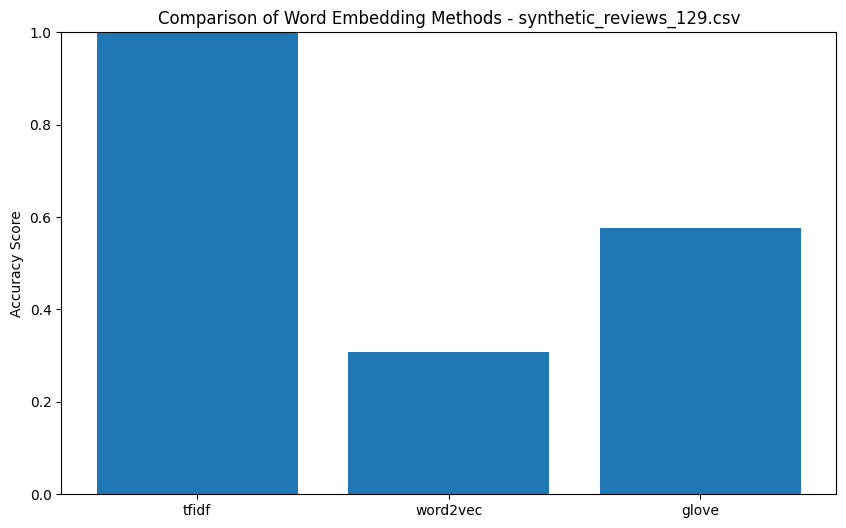


Processing synthetic_reviews_300.csv
Loaded 300 reviews
Sentiment distribution:
sentiment
 1    100
 0    100
-1    100
Name: count, dtype: int64
Generating embeddings...
TFIDF accuracy: 1.00
WORD2VEC accuracy: 0.90
GLOVE accuracy: 0.32


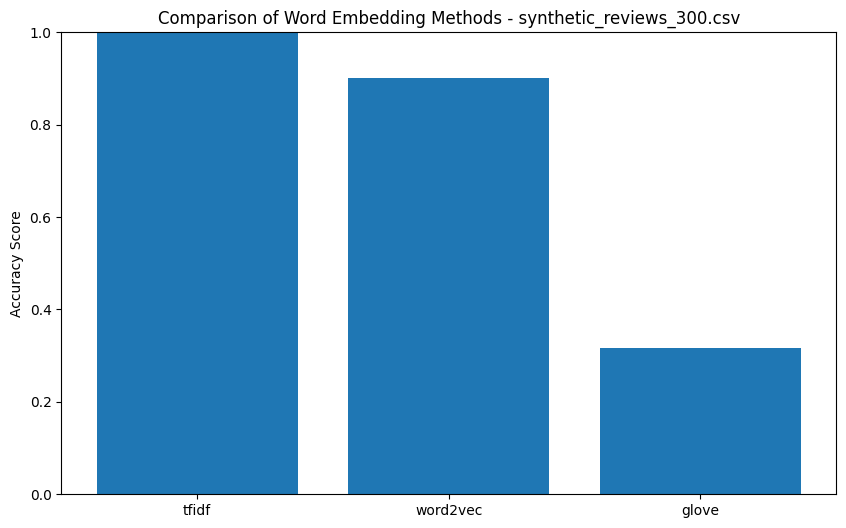

Accuracies over all test files TFIDF :  [1. 1.]
Accuracies over all test files WORD2VEC :  [0.30769231 0.9       ]
Accuracies over all test files GLOVE :  [0.57692308 0.31666667]
Average accuracies:  [1.         0.60384615 0.44679487]


TestResults(failed=0, attempted=4)

In [5]:
def evaluate_embeddings(csv_files):
    """
    Evaluate embedding methods on multiple CSV files.

    Args:
        csv_files (list): List of CSV filenames

    Returns:
        dict: Results containing accuracies for each method and file
    """

    results = {
        'files': csv_files,
        'accuracies': {
            'tfidf': np.zeros(len(csv_files)),
            'word2vec': np.zeros(len(csv_files)),
            'glove': np.zeros(len(csv_files))
        }
    }

    preprocessor = TextPreprocessor()
    word_embeddings = WordEmbeddings()

    for i, file in enumerate(csv_files):
        # Load reviews
        df = pd.read_csv(file)
        print(f"\nProcessing {file}")
        print(f"Loaded {len(df)} reviews")
        print("Sentiment distribution:")
        print(df['sentiment'].value_counts())

        # Generate embeddings
        print("Generating embeddings...")
        tfidf_features, tfidf_vectorizer = word_embeddings.create_tfidf_features(df['review'])
        w2v_features, w2v_model = word_embeddings.create_word2vec_features(df['review'])
        glove_dict = word_embeddings.load_glove_vectors('sample_glove.txt', vector_size=10)
        glove_features = word_embeddings.create_glove_features(df['review'], glove_dict)

        # Train test split
        X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
            tfidf_features.toarray(), df['sentiment'], test_size=0.2, random_state=42,
            stratify=df['sentiment']
        )
        X_train_w2v, X_test_w2v, _, _ = train_test_split(
            w2v_features, df['sentiment'], test_size=0.2, random_state=42,
            stratify=df['sentiment']
        )
        X_train_glove, X_test_glove, _, _ = train_test_split(
            glove_features, df['sentiment'], test_size=0.2, random_state=42,
            stratify=df['sentiment']
        )

        # Train and evaluate
        models = {
            'tfidf': LogisticRegression(random_state=42),
            'word2vec': LogisticRegression(random_state=42),
            'glove': LogisticRegression(random_state=42)
        }

        X_trains = {
            'tfidf': X_train_tfidf,
            'word2vec': X_train_w2v,
            'glove': X_train_glove
        }

        X_tests = {
            'tfidf': X_test_tfidf,
            'word2vec': X_test_w2v,
            'glove': X_test_glove
        }

        for method in models:
            models[method].fit(X_trains[method], y_train)
            acc = models[method].score(X_tests[method], y_test)
            results['accuracies'][method][i] = acc
            print(f"{method.upper()} accuracy: {acc:.2f}")

        # Visualize results for this file
        plt.figure(figsize=(10, 6))
        plt.bar(list(models.keys()), [results['accuracies'][m][i] for m in models])
        plt.title(f'Comparison of Word Embedding Methods - {file}')
        plt.ylabel('Accuracy Score')
        plt.ylim(0, 1)
        plt.show()

    return results


# List of files to process
csv_files = ['synthetic_reviews_129.csv', 'synthetic_reviews_300.csv']

# Run evaluation
results = evaluate_embeddings(csv_files)

# Calculate average accuracies across files
avg_acc = []
for method in results['accuracies']:
    print('Accuracies over all test files', method.upper(), ': ', results['accuracies'][method])
    avg_acc = np.append(avg_acc, np.mean(results['accuracies'][method]))

print('Average accuracies: ', avg_acc)

import doctest
"""
  >>> np.isclose(results['accuracies']['tfidf'], [1., 1.], atol=1e-01)
  array([ True,  True])
  >>> np.isclose(results['accuracies']['word2vec'], [0.30769231, 0.95], atol=1e-01)
  array([ True,  True])
  >>> np.isclose(results['accuracies']['glove'], [0.57692308, 0.31666667], atol=1e-01)
  array([ True,  True])
  >>> np.isclose(avg_acc, [1., 0.62884615, 0.44679487], atol=1e-01)
  array([ True,  True,  True])
"""
doctest.testmod()

##**Example Predictions - Synthetic Data**

- Experiment with the two review files included in the cell below (synthetic_reviews_129.csv, synthetic_reviews_300.csv)
  (enable one or the other and run the cell)
- Update the examples list


In [6]:
# Example predictions

#Set the review files here:
review_file = 'synthetic_reviews_129.csv'
#review_file = 'synthetic_reviews_300.csv'

def predict_sentiment(text, preprocessor, method='tfidf', tfidf_vectorizer=None, w2v_model=None, glove_dict=None, trained_clf=None):
    """Predict sentiment using specified method."""
    if method == 'tfidf':
        features = tfidf_vectorizer.transform([text])
        prediction = trained_clf.predict(features.toarray())[0]
        return prediction, features.toarray()

    elif method == 'word2vec':
        processed_text = preprocessor.preprocess_text(text)['final']
        word_vectors = [w2v_model.wv[word] for word in processed_text if word in w2v_model.wv]
        if word_vectors:
            features = np.mean(word_vectors, axis=0).reshape(1, -1)
        else:
            features = np.zeros((1, w2v_model.vector_size))
        prediction = trained_clf.predict(features)[0]
        return prediction, features

    elif method == 'glove':
        processed_text = preprocessor.preprocess_text(text)['final']
        word_vectors = [glove_dict[word] for word in processed_text if word in glove_dict]
        if word_vectors:
            features = np.mean(word_vectors, axis=0).reshape(1, -1)
        else:
            features = np.zeros((1, len(next(iter(glove_dict.values())))))
        prediction = trained_clf.predict(features)[0]
        return prediction, features


# Initial setup and feature generation
preprocessor = TextPreprocessor()
word_embeddings = WordEmbeddings()

# Load reviews from CSV
df = pd.read_csv(review_file)
print(f"Loaded {len(df)} reviews")
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

print("Generating embeddings...")
tfidf_features, tfidf_vectorizer = word_embeddings.create_tfidf_features(df['review'])
w2v_features, w2v_model = word_embeddings.create_word2vec_features(df['review'])
glove_dict = word_embeddings.load_glove_vectors('sample_glove.txt', vector_size=10)
glove_features = word_embeddings.create_glove_features(df['review'], glove_dict)

# Train test split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(
    tfidf_features.toarray(), df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)
X_train_w2v, X_test_w2v, _, _ = train_test_split(
    w2v_features, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)
X_train_glove, X_test_glove, _, _ = train_test_split(
    glove_features, df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment']
)

# Train classifiers
tfidf_clf = LogisticRegression(random_state=42)
w2v_clf = LogisticRegression(random_state=42)
glove_clf = LogisticRegression(random_state=42)

tfidf_clf.fit(X_train_tfidf, y_train)
w2v_clf.fit(X_train_w2v, y_train)
glove_clf.fit(X_train_glove, y_train)

#Create at least 10 example_reviews here.
#The first listed is directly from the training dataset.
#Use a few from the dataset to see how prediction works on the training dataset
#for the '129' and '300' sentence files.
#The second list is a made-up review (not included in the training set).
#Create several of your own made-up reviews and observe the prediction
#performance for the '129' and '300' sentence files.
example_reviews = [
    "This product is fantastic, works exactly as described!",
    "I hate it.  terrible design!",
    "Don't buy this shit.",
    "I really enjoy using the product. Would definitely recommend to my friends!",
    "Not as good as described, but still works.",
    "Total waste of money.",
    "It was terrible, and it ran out of battery so quickly.",
    "Great product, good price.",
    "Not a wise choice.",
    "It is easy to use, but the material looks cheap.",
    "Awesome! It is such a lovely dress.",
    "It is fine considering its price, but I would not buy it again."
]

print("\nExample Predictions:")
for review in example_reviews:
    print(f"\nReview: {review}")
    tfidf_pred, tfidf_feat = predict_sentiment(review, preprocessor, 'tfidf',
                                             tfidf_vectorizer=tfidf_vectorizer,
                                             trained_clf=tfidf_clf)
    w2v_pred, w2v_feat = predict_sentiment(review, preprocessor, 'word2vec',
                                         w2v_model=w2v_model,
                                         trained_clf=w2v_clf)
    glove_pred, glove_feat = predict_sentiment(review, preprocessor, 'glove',
                                             glove_dict=glove_dict,
                                             trained_clf=glove_clf)
    print(f"TF-IDF prediction: {tfidf_pred} (1=positive, 0=neutral, -1=negative)")
    print(f"Word2Vec prediction: {w2v_pred} (1=positive, 0=neutral, -1=negative)")
    print(f"GloVe prediction: {glove_pred} (1=positive, 0=neutral, -1=negative)")

Loaded 129 reviews

Sentiment distribution:
sentiment
 0    43
-1    43
 1    43
Name: count, dtype: int64
Generating embeddings...

Example Predictions:

Review: This product is fantastic, works exactly as described!
TF-IDF prediction: 1 (1=positive, 0=neutral, -1=negative)
Word2Vec prediction: -1 (1=positive, 0=neutral, -1=negative)
GloVe prediction: 1 (1=positive, 0=neutral, -1=negative)

Review: I hate it.  terrible design!
TF-IDF prediction: -1 (1=positive, 0=neutral, -1=negative)
Word2Vec prediction: -1 (1=positive, 0=neutral, -1=negative)
GloVe prediction: -1 (1=positive, 0=neutral, -1=negative)

Review: Don't buy this shit.
TF-IDF prediction: -1 (1=positive, 0=neutral, -1=negative)
Word2Vec prediction: -1 (1=positive, 0=neutral, -1=negative)
GloVe prediction: -1 (1=positive, 0=neutral, -1=negative)

Review: I really enjoy using the product. Would definitely recommend to my friends!
TF-IDF prediction: 1 (1=positive, 0=neutral, -1=negative)
Word2Vec prediction: -1 (1=positive, 0=

**REFLECTION**   
Answer the following questions:


1. Implementation Analysis:
Compare the sentiment analysis results using TF-IDF, Word2Vec, and GloVe embeddings in your implementation. Which performed better for the 'synthetic_reviews_129.csv' product review dataset and why do you think that was the case? Support your answer with specific examples from your results.
2. Compare the sentiment analysis results for the 2 different review files provided ('synthetic_reviews_129.csv', 'synthetic_reviews_300.csv').  Which embeddings technique consistently performed best and which performed worst.  Provide possible reasons why.  
3. Technical Understanding:
Suppose you encountered a new product review containing words not present in your training vocabulary. Explain how each embedding method (TF-IDF, Word2Vec, GloVe) handles out-of-vocabulary words, and propose a strategy to improve handling of such cases.
4. Practical Application:
Suppose your model shows high accuracy but poor real-world performance on certain product categories. How could you use the word embedding visualizations to diagnose potential biases or gaps in your model's understanding of product-specific terminology? Include specific visualization techniques in your answer.


Answer the following questions:

1. Implementation Analysis: Compare the sentiment analysis results using TF-IDF, Word2Vec, and GloVe embeddings in your implementation. Which performed better for the 'synthetic_reviews_129.csv' product review dataset and why do you think that was the case? Support your answer with specific examples from your results.

   **My Ans:** For the 129 review, I think TF-IDF is the better method, since from the bar chart we can see it has the highest accuracy score.

2. Compare the sentiment analysis results for the 2 different review files provided ('synthetic_reviews_129.csv', 'synthetic_reviews_300.csv'). Which embeddings technique consistently performed best and which performed worst. Provide possible reasons why.

   **My Ans:** Comparint the 129 review and the 300 review, I think TF-TDF consistently perfrom better, while Glove can be considered as the worst model.

3. Technical Understanding: Suppose you encountered a new product review containing words not present in your training vocabulary. Explain how each embedding method (TF-IDF, Word2Vec, GloVe) handles out-of-vocabulary words, and propose a strategy to improve handling of such cases.

   **My Ans:** For the TF-TDF method, it just simply ignores the oov words; for the Word2Vec and Glove, we can assign the unknown words to a separare group: 'UNK' or 'OOV'.

4. Practical Application: Suppose your model shows high accuracy but poor real-world performance on certain product categories. How could you use the word embedding visualizations to diagnose potential biases or gaps in your model's understanding of product-specific terminology? Include specific visualization techniques in your answer.

​        **My Ans:** Maybe it is because the embeddings does not perform well in the new scenario. We may use a heatmap to see the cosine similarity and check whether the embeddings follow the reasonable categories.

##**Assignment extension - 1**
Find a real dataset to analyze and discuss the difference between it and the synthetic dataset.  

Here are relevant datasets for student review analysis:

Amazon Product Reviews Dataset:

- "Amazon Product Data" (5-core) by Julian McAuley   
  Contains reviews across multiple product categories
  Easy to download subsets by category
  Source: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews  
  **NOTE**:  The code provided uses accesses and parses this dataset (you may use this if you'd like).

- Yelp Reviews Dataset:  
  Free academic dataset from Yelp
  Contains business reviews with ratings
  Source: https://www.yelp.com/dataset

- IMDB Movie Reviews:  
  50K movie reviews labeled by sentiment
  Popular benchmark dataset
  Available through scikit-learn's load_files
  Source: http://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
!wget -nc http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
!wget -nc http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz
!gzip -d reviews_Electronics_5.json.gz
!gzip -d meta_Electronics.json.gz
!wget -nc http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/ratings_Electronics.csv

--2025-08-23 12:26:28--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495854086 (473M) [application/x-gzip]
Saving to: ‘reviews_Electronics_5.json.gz’

reviews_Electronics 100%[===================>] 472.88M   101MB/s    in 6.4s    

2025-08-23 12:26:35 (74.1 MB/s) - ‘reviews_Electronics_5.json.gz’ saved [495854086/495854086]

--2025-08-23 12:26:35--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Electronics.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186594679 (178M) [application/x-gzip]
Saving to: ‘meta_Electronics.json.gz’

meta_Electronics.js 100%[===

In [5]:
!pwd
!ls -lh

/content
total 2.3G
-rw-r--r-- 1 root root 633M Sep 24  2015 meta_Electronics.json
-rw-r--r-- 1 root root 304M Apr 27  2016 ratings_Electronics.csv
-rw-r--r-- 1 root root 1.4G Apr 26  2016 reviews_Electronics_5.json
drwxr-xr-x 1 root root 4.0K Aug 21 13:41 sample_data


In [7]:
import pandas as pd
import gzip
import json
def parse_amazon_reviews(path, max_reviews=1000):
    """
    Parse Amazon review data from a .json.gz or a .json (JSON Lines) file.
    Returns a balanced DataFrame with columns: ['review', 'sentiment'].
    """
    path = str(path)

    if path.endswith(".gz"):
        opener = lambda p: gzip.open(p, mode="rt", encoding="utf-8")
    else:
        opener = lambda p: open(p, mode="r", encoding="utf-8")

    reviews = []
    with opener(path) as f:
        for i, line in enumerate(f):
            if i >= max_reviews:
                break
            try:
                review = json.loads(line)
            except json.JSONDecodeError:
                continue


            rating = float(review.get('overall', 0))
            if rating >= 4:
                sentiment = 1
            elif rating <= 2:
                sentiment = -1
            else:
                sentiment = 0

            text = (review.get('reviewText') or "").strip()
            if text:
                reviews.append({'review': text, 'sentiment': sentiment})

    df = pd.DataFrame(reviews)

    if not df.empty:
        min_samples = df['sentiment'].value_counts().min()
        if min_samples > 0 and df['sentiment'].nunique() > 1:
            df = pd.concat([
                df[df['sentiment'] == label].sample(n=min_samples, random_state=42)
                for label in df['sentiment'].unique()
            ]).sample(frac=1, random_state=42)  # shuffle

    return df


Processing amazon_electronics_reviews.csv
Loaded 1251 reviews
Sentiment distribution:
sentiment
 0    417
 1    417
-1    417
Name: count, dtype: int64
Generating embeddings...
TFIDF accuracy: 0.57
WORD2VEC accuracy: 0.35
GLOVE accuracy: 0.41


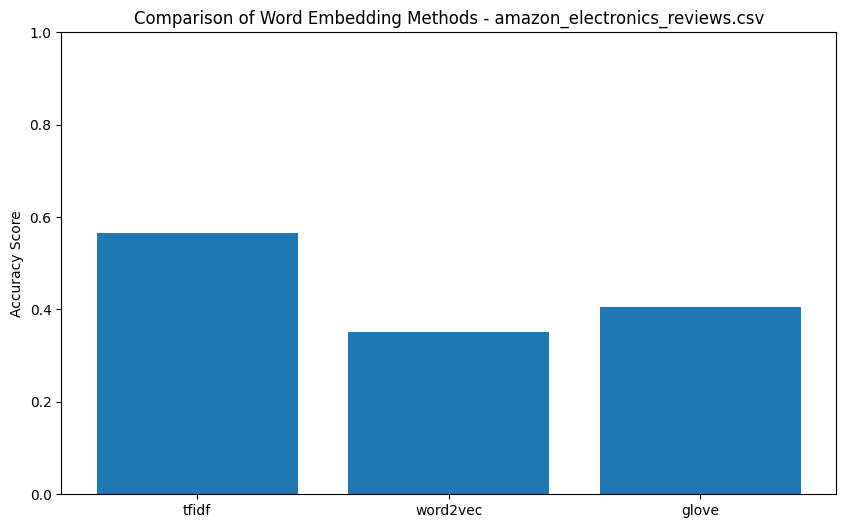

Accuracies over all test files TFIDF :  [0.56573705]
Accuracies over all test files WORD2VEC :  [0.35059761]
Accuracies over all test files GLOVE :  [0.4063745]
Average accuracies:  [0.56573705 0.35059761 0.4063745 ]


In [8]:
# Load Amazon reviews
df = parse_amazon_reviews('/content/reviews_Electronics_5.json', max_reviews=5000)

# Clean the reviews data
df = df[df['review'].notna()]  # Remove null rows
df = df[df['review'].str.len() > 0]  # Remove empty reviews
df['review'] = df['review'].replace({r'\s+': ' '}, regex=True).str.strip()  # Clean whitespace

# Balance classes again after cleaning
min_samples = df['sentiment'].value_counts().min()
balanced_df = pd.concat([
    df[df['sentiment'] == label].sample(n=min_samples, random_state=42)
    for label in df['sentiment'].unique()
]).sample(frac=1, random_state=42)

# Save cleaned data
csv_filename = 'amazon_electronics_reviews.csv'
balanced_df.to_csv(csv_filename, index=False)

# Run evaluation
csv_files = [csv_filename]
results = evaluate_embeddings(csv_files)

# Calculate average accuracies across files
avg_acc = []
for method in results['accuracies']:
    print('Accuracies over all test files', method.upper(), ': ', results['accuracies'][method])
    avg_acc = np.append(avg_acc, np.mean(results['accuracies'][method]))

print('Average accuracies: ', avg_acc)

**REFLECTION**   
Answer the following questions:

1.  Compare the sentiment analysis results using TF-IDF, Word2Vec, and GloVe embeddings for a real dataset. Which performed best for the dataset you used and why do you think that was the case? Support your answer with specific examples from your results.
2. Why do you think the results for the real dataset differed from the synthetic one used in the previous cell?


Answer the following questions:

1. Compare the sentiment analysis results using TF-IDF, Word2Vec, and GloVe embeddings for a real dataset. Which performed best for the dataset you used and why do you think that was the case? Support your answer with specific examples from your results.

 **My Ans:** From the graphs, RF-TDF still perform (accuracy: 0.5657) better than the remaining models. RF-TDF has advantage in small-scale and sparse texts, such as reviews; while Word2Vec and Glove may be more suitable in larger data or richer sentimental scenario.

2. Why do you think the results for the real dataset differed from the synthetic one used in the previous cell?

 **My Ans:**I think in the synthetics one, some reviews are duplicate, and also real-world customers may not write reviews like the synthetic ones.